In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [119]:
class Network(object):
    """A network using Layer and Neuron"""
    
    def __init__(self, shape=[1,3,1]):
        self.shape = shape # Layout of network
        self.size = len(shape) # Number of layers
        self.m = max(shape)
        self.input_layer = Layer(shape[0], 0, self.m, "x")
        self.hidden_layer = Layer(shape[1], 1, self.m, "h")
        self.output_layer = Layer(shape[2], 2, self.m, "o")
        self.layers = [self.input_layer, self.hidden_layer, self.output_layer]
        

    def plot(self, G):
        for layer in self.layers:
            for node in layer.nodes:
                G.add_node(node.name, pos = node.pos, x = node.x)
                pos = nx.get_node_attributes(G, 'pos')
        nx.draw(G, pos=pos) 
        
        for input_node in self.input_layer.nodes:
            for hidden_node in self.hidden_layer.nodes:
                G.add_edge(input_node.name, hidden_node.name)
                for output_node in self.output_layer.nodes:
                    G.add_edge(hidden_node.name, output_node.name)
                    
        nx.draw_networkx_edges(G, pos=pos)


In [127]:
class Layer(object):
    """Sub class of Network"""
    
    def __init__(self, size, layer_pos, m, layer_name):
        self.size = size
        self.mid = int(m/2)
        self.layer_pos = layer_pos
        self.values = np.arange(self.size)
        self.layer_name = layer_name
        if self.size == 1:
            y_vals = np.ones(self.size)
        else:
            y_vals = np.linspace(self.mid - self.size, self.size + self.mid, self.size)
            
        self.nodes = [Neuron(name = self.layer_name + str(k), pos = (self.layer_pos, y_vals[k])) for k in range(self.size)]
        

In [128]:
class Neuron(object):
    """A neuron to use in a neural network with multiple activation function options"""
    
    def __init__(self, name, pos,  x=0.0, af="sigmoid"):
        # Initialize variables 
        self.bias = np.random.uniform(0,1)
        self.weights = np.random.uniform(0,1)
        self.num = np.random.uniform(0,1)
        self.x = x
        self.af = af
        self.pos = pos
        self.name = name
        
    @staticmethod
    def sigmoid(x):
        # Sigmoid (activation) function
        return 1.0 / (1.0 + np.exp(-x))
        
    @staticmethod
    def relu(x):
        # ReLU activation function 
        return np.maximum(0, x)
    
    def forward(self):
        # Compute the forward output of the neuron
        # Summation of (input array (x) * weights) + bias
        summ = np.sum(self.x * self.weights) + self.bias
        
        if self.af == "sigmoid":
            # Compute sigmoid of summ.
            self.num = self.sigmoid(summ)
            
        if self.af == "ReLU":
            # Compute the ReLU (Rectifier) of summ.
            self.num = self.relu(summ)
            
        return self.num
    

In [129]:
Norm = Network()
G = nx.Graph()

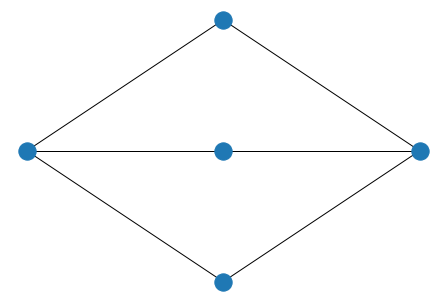

In [130]:
Norm.plot(G)

In [ ]:
# Create input layer.
n = 4
x = np.random.uniform(0,1,size=n)

# Creating first layer of network.
n1 = Neuron(x)
n2 = Neuron(x)
n3 = Neuron(x)

In [ ]:
# Calculating outputs from the first three neurons
x_2 = np.array([n1.forward(), n2.forward(), n3.forward()])
x_2

In [ ]:
# Create second layer of neurons using previous layers data
n4 = Neuron(x_2)
n5 = Neuron(x_2)
n6 = Neuron(x_2)

In [ ]:
# Calculating outputs of the second layer of neurons
x_3 = np.array([n4.forward(), n5.forward(), n6.forward()])
x_3

In [ ]:
n7 = Neuron(x_3)

In [ ]:
n7.forward()

In [ ]:
n7.add_to_network()